# Race and ethnicity distribution in the City of Washington D.C., 2020
This dataset provides information on race and ethnicity demographics within the City of Washington D.C. in 2020. In this notebook, I will inspect the data, clean and trim the data, produce a variety of plots and maps based on racial distribution.

Name: Rachel Seiberg

First, I need to import the geopandas library to conduct my data exploration and  visualization

In [1]:
import pandas as pd
import geopandas as gpd

Next, I am uploading my data on race and ethnicity demographics in 2020 to Jupyter notebook

In [2]:
race= pd.read_csv('census_race_ethnicity_2020.csv')

# Preliminary inspection of the data
In order to get familiar with my data, I am executing a few functions:

In [3]:
race.info

<bound method DataFrame.info of         Geo_FIPS                                          Geo_QName  \
0    11001000101  Census Tract 1.01, District of Columbia, Distr...   
1    11001000102  Census Tract 1.02, District of Columbia, Distr...   
2    11001000201  Census Tract 2.01, District of Columbia, Distr...   
3    11001000202  Census Tract 2.02, District of Columbia, Distr...   
4    11001000300  Census Tract 3, District of Columbia, District...   
..           ...                                                ...   
201  11001010900  Census Tract 109, District of Columbia, Distri...   
202  11001011001  Census Tract 110.01, District of Columbia, Dis...   
203  11001011002  Census Tract 110.02, District of Columbia, Dis...   
204  11001011100  Census Tract 111, District of Columbia, Distri...   
205  11001980000  Census Tract 9800, District of Columbia, Distr...   

    Geo_FILEID Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  \
0        ACSSF         dc         140  

In [4]:
race.shape

(206, 88)

In [5]:
race.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,PCT_SE_A04001_008,PCT_SE_A04001_009,PCT_SE_A04001_010,PCT_SE_A04001_011,PCT_SE_A04001_012,PCT_SE_A04001_013,PCT_SE_A04001_014,PCT_SE_A04001_015,PCT_SE_A04001_016,PCT_SE_A04001_017
0,11001000101,"Census Tract 1.01, District of Columbia, Distr...",ACSSF,dc,140,0,9,NaN,NaN,NaN,...,1.12,0.16,12.08,11.92,0.00,0.0,0.0,0.0,0.00,0.16
1,11001000102,"Census Tract 1.02, District of Columbia, Distr...",ACSSF,dc,140,0,10,NaN,NaN,NaN,...,0.36,1.05,11.66,5.06,0.00,0.0,0.0,0.0,4.07,2.53
2,11001000201,"Census Tract 2.01, District of Columbia, Distr...",ACSSF,dc,140,0,11,NaN,NaN,NaN,...,0.00,4.05,11.40,7.18,0.20,0.0,0.0,0.0,2.32,1.71
3,11001000202,"Census Tract 2.02, District of Columbia, Distr...",ACSSF,dc,140,0,12,NaN,NaN,NaN,...,0.00,2.92,7.87,4.14,0.24,0.0,0.0,0.0,2.77,0.73
4,11001000300,"Census Tract 3, District of Columbia, District...",ACSSF,dc,140,0,13,NaN,NaN,NaN,...,0.58,1.25,12.47,8.75,0.00,0.0,0.0,0.0,0.00,3.72


# Overwriting default display settings
I want to see all of the column names in the table, so I'm using pandas to overwrite the default settings

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
race.sample()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_PUMA5,Geo_PUMA1,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,PCT_SE_A04001_002,PCT_SE_A04001_003,PCT_SE_A04001_004,PCT_SE_A04001_005,PCT_SE_A04001_006,PCT_SE_A04001_007,PCT_SE_A04001_008,PCT_SE_A04001_009,PCT_SE_A04001_010,PCT_SE_A04001_011,PCT_SE_A04001_012,PCT_SE_A04001_013,PCT_SE_A04001_014,PCT_SE_A04001_015,PCT_SE_A04001_016,PCT_SE_A04001_017
121,11001007502,"Census Tract 75.02, District of Columbia, Dist...",ACSSF,dc,140,0,130,NaN,NaN,NaN,NaN,11,1,NaN,NaN,7502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US11001007502,Census Tract 75.02,NaN,NaN,NaN,5615,5615,44,5531,0,0,0,18,22,0,0,0,0,0,0,0,0,100.0,0.78,98.5,0.0,0.0,0.0,0.32,0.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data types
Because Python is known for removing 0's from FIPS codes, I'm going to ensure that the FIPS codes are read as a string to maintain the integrity of the code.

In [8]:
race.Geo_FIPS.head()

0    11001000101
1    11001000102
2    11001000201
3    11001000202
4    11001000300
Name: Geo_FIPS, dtype: int64

In [9]:
race.Geo_STATE.head()

0    11
1    11
2    11
3    11
4    11
Name: Geo_STATE, dtype: int64

In [10]:
race.Geo_COUNTY.head()

0    1
1    1
2    1
3    1
4    1
Name: Geo_COUNTY, dtype: int64

I'm going to convert the FIPS columns to a string because when I ran Geo_COUNTY, Python removed the 0's.

In [11]:
race= pd.read_csv(
    'census_race_ethnicity_2020.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY':str
    }
)

In [12]:
race.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_PUMA5,Geo_PUMA1,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,PCT_SE_A04001_002,PCT_SE_A04001_003,PCT_SE_A04001_004,PCT_SE_A04001_005,PCT_SE_A04001_006,PCT_SE_A04001_007,PCT_SE_A04001_008,PCT_SE_A04001_009,PCT_SE_A04001_010,PCT_SE_A04001_011,PCT_SE_A04001_012,PCT_SE_A04001_013,PCT_SE_A04001_014,PCT_SE_A04001_015,PCT_SE_A04001_016,PCT_SE_A04001_017
0,11001000101,"Census Tract 1.01, District of Columbia, Distr...",ACSSF,dc,140,0,9,NaN,NaN,NaN,NaN,11,001,NaN,NaN,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US11001000101,Census Tract 1.01,NaN,NaN,NaN,1250,1099,1029,0,0,54,0,14,2,151,149,0,0,0,0,0,2,87.92,82.32,0.00,0.00,4.32,0.00,1.12,0.16,12.08,11.92,0.00,0.0,0.0,0.0,0.00,0.16
1,11001000102,"Census Tract 1.02, District of Columbia, Distr...",ACSSF,dc,140,0,10,NaN,NaN,NaN,NaN,11,001,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US11001000102,Census Tract 1.02,NaN,NaN,NaN,3318,2931,2700,34,0,150,0,12,35,387,168,0,0,0,0,135,84,88.34,81.37,1.02,0.00,4.52,0.00,0.36,1.05,11.66,5.06,0.00,0.0,0.0,0.0,4.07,2.53
2,11001000201,"Census Tract 2.01, District of Columbia, Distr...",ACSSF,dc,140,0,11,NaN,NaN,NaN,NaN,11,001,NaN,NaN,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US11001000201,Census Tract 2.01,NaN,NaN,NaN,3972,3519,2200,239,25,894,0,0,161,453,285,8,0,0,0,92,68,88.60,55.39,6.02,0.63,22.51,0.00,0.00,4.05,11.40,7.18,0.20,0.0,0.0,0.0,2.32,1.71
3,11001000202,"Census Tract 2.02, District of Columbia, Distr...",ACSSF,dc,140,0,12,NaN,NaN,NaN,NaN,11,001,NaN,NaN,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US11001000202,Census Tract 2.02,NaN,NaN,NaN,4665,4298,3728,131,0,285,18,0,136,367,193,11,0,0,0,129,34,92.13,79.91,2.81,0.00,6.11,0.39,0.00,2.92,7.87,4.14,0.24,0.0,0.0,0.0,2.77,0.73
4,11001000300,"Census Tract 3, District of Columbia, District...",ACSSF,dc,140,0,13,NaN,NaN,NaN,NaN,11,001,NaN,NaN,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US11001000300,Census Tract 3,NaN,NaN,NaN,6504,5693,5017,178,0,379,0,38,81,811,569,0,0,0,0,0,242,87.53,77.14,2.74,0.00,5.83,0.00,0.58,1.25,12.47,8.75,0.00,0.0,0.0,0.0,0.00,3.72


I want to make sure that I now have the correct data types. I'm going to practice checking data types in two different ways.

In [13]:
race.dtypes

Geo_FIPS              object
Geo_QName             object
Geo_FILEID            object
Geo_STUSAB            object
Geo_SUMLEV             int64
Geo_GEOCOMP            int64
Geo_LOGRECNO           int64
Geo_US               float64
Geo_REGION           float64
Geo_DIVISION         float64
Geo_STATECE          float64
Geo_STATE             object
Geo_COUNTY            object
Geo_COUSUB           float64
Geo_PLACE            float64
Geo_TRACT              int64
Geo_BLKGRP           float64
Geo_CONCIT           float64
Geo_AIANHH           float64
Geo_AIANHHFP         float64
Geo_AIHHTLI          float64
Geo_AITSCE           float64
Geo_AITS             float64
Geo_ANRC             float64
Geo_CBSA             float64
Geo_CSA              float64
Geo_METDIV           float64
Geo_MACC             float64
Geo_MEMI             float64
Geo_NECTA            float64
Geo_CNECTA           float64
Geo_NECTADIV         float64
Geo_UA               float64
Geo_UACP             float64
Geo_CDCURR    

In [14]:
race.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 88 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           206 non-null    object 
 1   Geo_QName          206 non-null    object 
 2   Geo_FILEID         206 non-null    object 
 3   Geo_STUSAB         206 non-null    object 
 4   Geo_SUMLEV         206 non-null    int64  
 5   Geo_GEOCOMP        206 non-null    int64  
 6   Geo_LOGRECNO       206 non-null    int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          206 non-null    object 
 12  Geo_COUNTY         206 non-null    object 
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          206 non-null    int64  
 16  Geo_BLKGRP         0 non-n

# Data trimming
I am choosing to trim my data of some of its columns.

In [15]:
race.columns[race.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

To trim my data, I want to delete columns that have all empty values.

In [16]:
race=race.dropna(axis=1,how="all")

In [17]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           206 non-null    object 
 1   Geo_QName          206 non-null    object 
 2   Geo_FILEID         206 non-null    object 
 3   Geo_STUSAB         206 non-null    object 
 4   Geo_SUMLEV         206 non-null    int64  
 5   Geo_GEOCOMP        206 non-null    int64  
 6   Geo_LOGRECNO       206 non-null    int64  
 7   Geo_STATE          206 non-null    object 
 8   Geo_COUNTY         206 non-null    object 
 9   Geo_TRACT          206 non-null    int64  
 10  Geo_GEOID          206 non-null    object 
 11  Geo_NAME           206 non-null    object 
 12  SE_A04001_001      206 non-null    int64  
 13  SE_A04001_002      206 non-null    int64  
 14  SE_A04001_003      206 non-null    int64  
 15  SE_A04001_004      206 non-null    int64  
 16  SE_A04001_005      206 non

In [18]:
race.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_GEOID,Geo_NAME,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,PCT_SE_A04001_002,PCT_SE_A04001_003,PCT_SE_A04001_004,PCT_SE_A04001_005,PCT_SE_A04001_006,PCT_SE_A04001_007,PCT_SE_A04001_008,PCT_SE_A04001_009,PCT_SE_A04001_010,PCT_SE_A04001_011,PCT_SE_A04001_012,PCT_SE_A04001_013,PCT_SE_A04001_014,PCT_SE_A04001_015,PCT_SE_A04001_016,PCT_SE_A04001_017
0,11001000101,"Census Tract 1.01, District of Columbia, Distr...",ACSSF,dc,140,0,9,11,001,101,14000US11001000101,Census Tract 1.01,1250,1099,1029,0,0,54,0,14,2,151,149,0,0,0,0,0,2,87.92,82.32,0.00,0.00,4.32,0.00,1.12,0.16,12.08,11.92,0.00,0.0,0.0,0.0,0.00,0.16
1,11001000102,"Census Tract 1.02, District of Columbia, Distr...",ACSSF,dc,140,0,10,11,001,102,14000US11001000102,Census Tract 1.02,3318,2931,2700,34,0,150,0,12,35,387,168,0,0,0,0,135,84,88.34,81.37,1.02,0.00,4.52,0.00,0.36,1.05,11.66,5.06,0.00,0.0,0.0,0.0,4.07,2.53
2,11001000201,"Census Tract 2.01, District of Columbia, Distr...",ACSSF,dc,140,0,11,11,001,201,14000US11001000201,Census Tract 2.01,3972,3519,2200,239,25,894,0,0,161,453,285,8,0,0,0,92,68,88.60,55.39,6.02,0.63,22.51,0.00,0.00,4.05,11.40,7.18,0.20,0.0,0.0,0.0,2.32,1.71
3,11001000202,"Census Tract 2.02, District of Columbia, Distr...",ACSSF,dc,140,0,12,11,001,202,14000US11001000202,Census Tract 2.02,4665,4298,3728,131,0,285,18,0,136,367,193,11,0,0,0,129,34,92.13,79.91,2.81,0.00,6.11,0.39,0.00,2.92,7.87,4.14,0.24,0.0,0.0,0.0,2.77,0.73
4,11001000300,"Census Tract 3, District of Columbia, District...",ACSSF,dc,140,0,13,11,001,300,14000US11001000300,Census Tract 3,6504,5693,5017,178,0,379,0,38,81,811,569,0,0,0,0,0,242,87.53,77.14,2.74,0.00,5.83,0.00,0.58,1.25,12.47,8.75,0.00,0.0,0.0,0.0,0.00,3.72


In [19]:
columns_to_keep=['Geo_FIPS',
                 'SE_A04001_001',
                 'SE_A04001_002',
                 'SE_A04001_003',
                 'SE_A04001_004',
                 'SE_A04001_005',
                 'SE_A04001_006',
                 'SE_A04001_007',
                 'SE_A04001_008',
                 'SE_A04001_009',
                 'SE_A04001_010',
                 'SE_A04001_011',
                 'SE_A04001_012',
                 'SE_A04001_013',
                 'SE_A04001_014',
                 'SE_A04001_015',
                 'SE_A04001_016',
                 'SE_A04001_017',]

In [20]:
columns_to_keep

['Geo_FIPS',
 'SE_A04001_001',
 'SE_A04001_002',
 'SE_A04001_003',
 'SE_A04001_004',
 'SE_A04001_005',
 'SE_A04001_006',
 'SE_A04001_007',
 'SE_A04001_008',
 'SE_A04001_009',
 'SE_A04001_010',
 'SE_A04001_011',
 'SE_A04001_012',
 'SE_A04001_013',
 'SE_A04001_014',
 'SE_A04001_015',
 'SE_A04001_016',
 'SE_A04001_017']

In [21]:
race2 = race[columns_to_keep]

# Rename columns

Next, I am going to rename the columns under scrutiny so that they are easier to understand.

In [22]:
columns=list(race2)

In [23]:
columns

['Geo_FIPS',
 'SE_A04001_001',
 'SE_A04001_002',
 'SE_A04001_003',
 'SE_A04001_004',
 'SE_A04001_005',
 'SE_A04001_006',
 'SE_A04001_007',
 'SE_A04001_008',
 'SE_A04001_009',
 'SE_A04001_010',
 'SE_A04001_011',
 'SE_A04001_012',
 'SE_A04001_013',
 'SE_A04001_014',
 'SE_A04001_015',
 'SE_A04001_016',
 'SE_A04001_017']

In [24]:
race2.columns= ['FIPS',
                'Total Population',
                'Not Hispanic or Latino',
                'Not Hispanic or Latino White Alone',
                'Not Hispanic or Latino Black Alone',
                'Not Hispanic or Latino American Indian and Alaska Native Alone',
                'Not Hispanic or Latino Asian Alone',
                'Not Hispanic or Latino Native Hawaiian and other Pacific Islander Alone',
                'Not Hispanic or Latino Some Other Race Alone',
                'Not Hispanic or Latino Two or More Races',
                'Hispanic or Latino',
                'Hispanic or Latino White Alone',
                'Hispanic or Latino Black Alone',
                'Hispanic or Latino American Indian and Alaska Native Alone',
                'Hispanic or Latino Asian Alone',
                'Hispanic or Latino Native Hawaiian and other Pacific Islander Alone',
                'Hispanic or Latino Some Other Race Alone',
                'Hispanic or Latino Two or More Races']

In [25]:
race2.sample(3)

,FIPS,Total Population,Not Hispanic or Latino,Not Hispanic or Latino White Alone,Not Hispanic or Latino Black Alone,Not Hispanic or Latino American Indian and Alaska Native Alone,Not Hispanic or Latino Asian Alone,Not Hispanic or Latino Native Hawaiian and other Pacific Islander Alone,Not Hispanic or Latino Some Other Race Alone,Not Hispanic or Latino Two or More Races,Hispanic or Latino,Hispanic or Latino White Alone,Hispanic or Latino Black Alone,Hispanic or Latino American Indian and Alaska Native Alone,Hispanic or Latino Asian Alone,Hispanic or Latino Native Hawaiian and other Pacific Islander Alone,Hispanic or Latino Some Other Race Alone,Hispanic or Latino Two or More Races
10,11001000703,3345,3059,2363,512,40,63,0,0,81,286,106,0,0,0,0,0,180
30,11001001702,3667,3354,1430,1674,0,23,0,103,124,313,229,16,0,0,0,61,7
56,11001003200,5201,3531,1125,2211,0,135,0,0,60,1670,285,262,0,0,0,1076,47


# Simple Statistics and Plots

Next, I want to run some simple statistics to describe the total population in Washington D.C.

In [26]:
race2['Total Population'].head()

0    1250
1    3318
2    3972
3    4665
4    6504
Name: Total Population, dtype: int64

In [27]:
race2['Total Population'].mean()

3407.640776699029

In [28]:
race2['Total Population'].median()

3319.5

In [29]:
race2['Total Population'].describe()

count     206.000000
mean     3407.640777
std      1160.459668
min        13.000000
25%      2558.250000
50%      3319.500000
75%      4176.000000
max      7730.000000
Name: Total Population, dtype: float64

Below, I will create a histogram and a boxplot to produce my first visualizations of the data- this time I can see the distribution of total population count by census tract.

<AxesSubplot: ylabel='Frequency'>

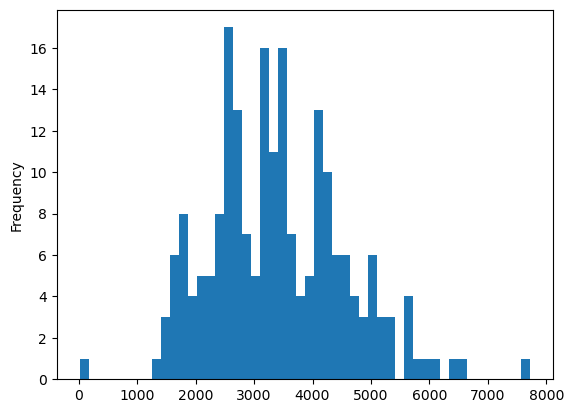

In [30]:
race2['Total Population'].plot.hist(bins=50)

<AxesSubplot: >

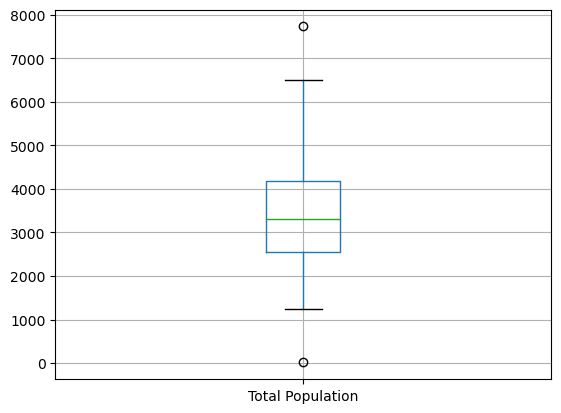

In [31]:
race2.boxplot(column=['Total Population'])

Last, I will produce a scatter plot assessing Not Hispanic or Latino Asian Alone versus Not Hispanic or Latino Black Alone.

<AxesSubplot: xlabel='Not Hispanic or Latino Asian Alone', ylabel='Not Hispanic or Latino Black Alone'>

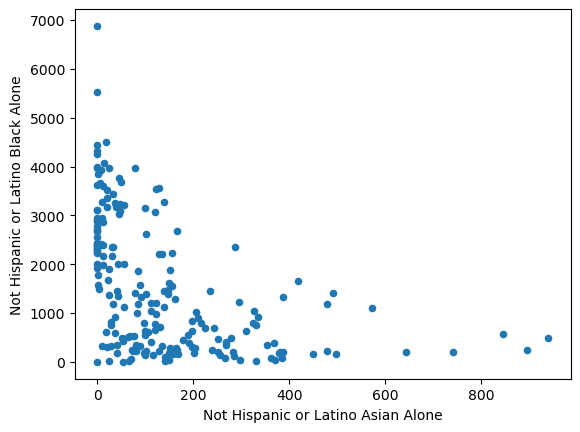

In [32]:
race2.plot.scatter(x='Not Hispanic or Latino Asian Alone',y='Not Hispanic or Latino Black Alone')

# Sorting Data

Next, I'm sorting my data from highest to lowest values by total population. 

In [33]:
race_sorted = race2.sort_values(by='Total Population',ascending = False)

In [34]:
race_sorted.head()

,FIPS,Total Population,Not Hispanic or Latino,Not Hispanic or Latino White Alone,Not Hispanic or Latino Black Alone,Not Hispanic or Latino American Indian and Alaska Native Alone,Not Hispanic or Latino Asian Alone,Not Hispanic or Latino Native Hawaiian and other Pacific Islander Alone,Not Hispanic or Latino Some Other Race Alone,Not Hispanic or Latino Two or More Races,Hispanic or Latino,Hispanic or Latino White Alone,Hispanic or Latino Black Alone,Hispanic or Latino American Indian and Alaska Native Alone,Hispanic or Latino Asian Alone,Hispanic or Latino Native Hawaiian and other Pacific Islander Alone,Hispanic or Latino Some Other Race Alone,Hispanic or Latino Two or More Races
128,11001007703,7730,6931,16,6880,23,0,0,0,12,799,0,109,0,0,0,690,0
4,11001000300,6504,5693,5017,178,0,379,0,38,81,811,569,0,0,0,0,0,242
200,11001010800,6351,5684,3994,576,32,844,7,4,227,667,450,42,17,15,0,72,71
48,11001002702,6055,4895,3538,635,5,310,0,233,174,1160,354,0,0,0,0,497,309
28,11001001500,6016,5169,4184,653,0,121,0,0,211,847,415,0,0,0,0,287,145


In [35]:
race_sorted[['FIPS','Total Population']].head(10)

,FIPS,Total Population
128,11001007703,7730
4,11001000300,6504
200,11001010800,6351
48,11001002702,6055
28,11001001500,6016
32,11001001804,5803
37,11001002101,5693
162,11001009400,5644
121,11001007502,5615
38,11001002102,5607


In [36]:
race_sorted[['FIPS','Total Population']].tail(10)

,FIPS,Total Population
91,11001005501,1700
161,11001009302,1678
64,11001003801,1677
42,11001002302,1624
85,11001005003,1617
114,11001007401,1525
5,11001000400,1481
109,11001007201,1473
0,11001000101,1250
205,11001980000,13


Next, I am creating a bar graph based that displays the top 10 census tracts with the highest non hispanic black alone population.

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Population of Non Hispanic Black Population in Washington D.C. in 2020'}, ylabel='FIPS'>

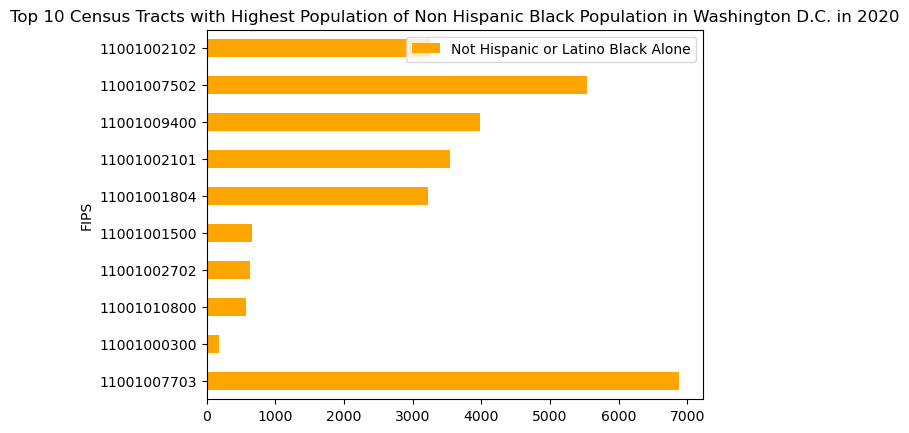

In [37]:
race_sorted.head(10).plot.barh(x='FIPS',
                               y= 'Not Hispanic or Latino Black Alone',
                               title= 'Top 10 Census Tracts with Highest Population of Non Hispanic Black Population in Washington D.C. in 2020',
                               color= 'orange')

# Filtering and subsetting data

Next, I will query the data to answer the following question: how many census tracts have less than 750 white people?

In [38]:
race2[race2['Not Hispanic or Latino White Alone']<=750]

,FIPS,Total Population,Not Hispanic or Latino,Not Hispanic or Latino White Alone,Not Hispanic or Latino Black Alone,Not Hispanic or Latino American Indian and Alaska Native Alone,Not Hispanic or Latino Asian Alone,Not Hispanic or Latino Native Hawaiian and other Pacific Islander Alone,Not Hispanic or Latino Some Other Race Alone,Not Hispanic or Latino Two or More Races,Hispanic or Latino,Hispanic or Latino White Alone,Hispanic or Latino Black Alone,Hispanic or Latino American Indian and Alaska Native Alone,Hispanic or Latino Asian Alone,Hispanic or Latino Native Hawaiian and other Pacific Islander Alone,Hispanic or Latino Some Other Race Alone,Hispanic or Latino Two or More Races
31,11001001803,4161,2949,472,2415,0,2,0,17,43,1212,51,29,0,0,0,1067,65
32,11001001804,5803,3869,371,3219,0,55,0,165,59,1934,100,239,0,0,0,1472,123
33,11001001901,4220,3487,671,2616,0,101,0,0,99,733,381,78,0,0,0,116,158
34,11001001902,2460,1936,444,1365,0,24,0,0,103,524,227,0,0,0,0,272,25
35,11001002001,3578,2071,282,1381,0,101,0,250,57,1507,288,13,0,0,0,1202,4
37,11001002101,5693,4427,596,3543,38,122,0,0,128,1266,249,130,0,0,0,812,75
38,11001002102,5607,4027,610,3258,0,37,0,0,122,1580,172,0,83,0,0,1264,61
40,11001002202,3223,2590,616,1902,7,24,0,0,41,633,159,0,0,0,0,474,0
42,11001002302,1624,1580,589,782,0,121,0,0,88,44,18,0,0,0,0,26,0
46,11001002504,3867,2125,739,899,0,210,0,0,277,1742,836,40,0,0,0,836,30


In [39]:
less_than_750_white= race2[race2['Not Hispanic or Latino White Alone']<=750]

In [40]:
print('There are ' + str(len(less_than_750_white)) + ' census tracts with less than 750 white people in them.')

There are 78 census tracts with less than 750 white people in them.


In [41]:
less_than_750_white[['FIPS','Not Hispanic or Latino White Alone']]

,FIPS,Not Hispanic or Latino White Alone
31,11001001803,472
32,11001001804,371
33,11001001901,671
34,11001001902,444
35,11001002001,282
37,11001002101,596
38,11001002102,610
40,11001002202,616
42,11001002302,589
46,11001002504,739


# Mapping

## Incorporating geopandas to read geojson

I am going to import geojson data to map this census data.

In [42]:
tracts=gpd.read_file('Low_Food_Access_Areas.geojson')
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,FID_GROCER,FID_GROC_1,FACILITYID,FID_POV_AC,GEOID,FIRST_TOTA,FIRST_UNDE,FIRST_OVER,POPAREA,SHAPE_LENG,PARTPOP,PARTUNDER1,PARTOVER18,PARTAREA,AREARATIO,GROCERYACC,FID_WARDPL,WARD,NAME,SHAPE_LE_1,SHAPE_AR_1,WRDPRTAREA,AREARTIO2,PARTPOP2,PRTOVR185,PRTUND185,PERCENTUND185,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,SHAPEAREA,SHAPELEN,geometry
0,1,77,-1,0,78,110010016004,1682,86,1596,875665.647356,8862.458495,1405,72,1333,731490.545391,0.835354,N,8,4,Ward 4,25130.994398,2.331492e+07,731492.0,1.0,1405,1333,72,0.051246,LowFoodAccessPly_36,{FF96FCBB-7D7E-4898-913E-5F212838668D},None,None,None,None,0,0,"MULTIPOLYGON (((-77.03633 38.99073, -77.03639 ..."
1,2,74,-1,0,75,110010016001,1191,71,1120,451499.442030,3878.614656,1191,71,1120,451499.452113,1.000000,N,8,4,Ward 4,25130.994398,2.331492e+07,451499.0,1.0,1191,1120,71,0.059614,LowFoodAccessPly_37,{B0964E8D-C59E-47E7-BBF1-B997B15ACD31},None,None,None,None,0,0,"POLYGON ((-77.02660 38.98452, -77.02687 38.984..."
2,3,69,-1,0,70,110010015001,1654,51,1603,834116.766326,7692.482644,1654,51,1603,834116.692261,1.000000,N,8,4,Ward 4,25130.994398,2.331492e+07,834115.0,1.0,1654,1603,51,0.030834,LowFoodAccessPly_38,{7C2582DE-0DBF-4496-9D85-C9EDF2EA8DFA},None,None,None,None,0,0,"MULTIPOLYGON (((-77.05260 38.96164, -77.05265 ..."
3,4,354,-1,0,428,110010103002,1312,455,857,240320.505856,2699.965876,1312,455,857,240320.503427,1.000000,N,8,4,Ward 4,25130.994398,2.331492e+07,239769.0,1.0,1312,857,455,0.346799,LowFoodAccessPly_39,{D5861A4D-9AAA-443F-A5EC-A099A62987C3},None,None,None,None,0,0,"POLYGON ((-77.02227 38.98138, -77.02239 38.981..."
4,5,75,-1,0,76,110010016002,606,62,544,192218.254228,2372.363010,606,62,544,192218.256000,1.000000,N,8,4,Ward 4,25130.994398,2.331492e+07,192218.0,1.0,606,544,62,0.102310,LowFoodAccessPly_40,{95062827-C1F9-4AC5-9DC3-8EE71FD0CBA4},None,None,None,None,0,0,"POLYGON ((-77.02643 38.97831, -77.02643 38.978..."


Next, I want to produce a preliminary plot of the data.

<AxesSubplot: >

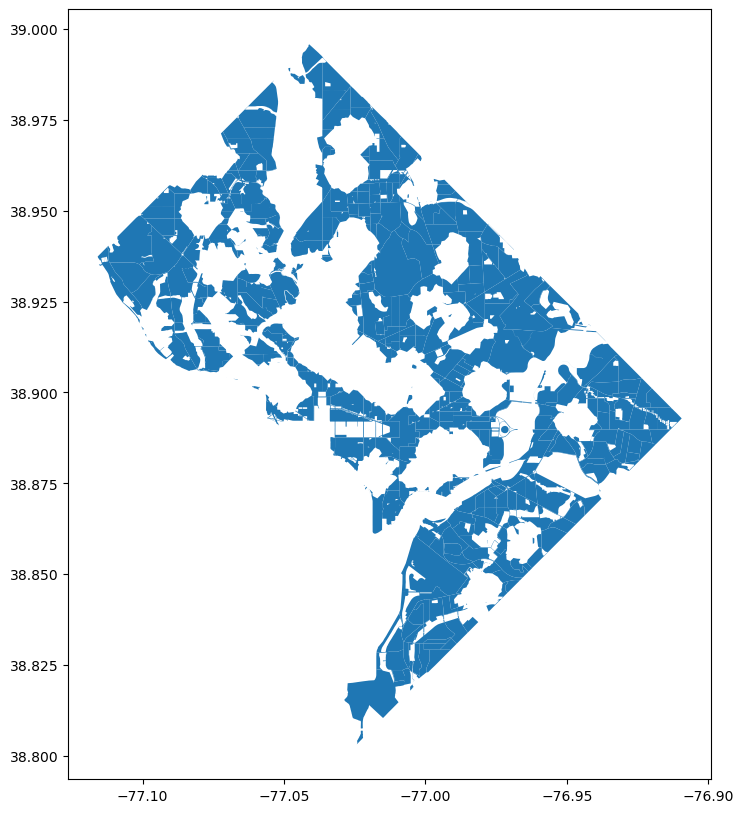

In [43]:
tracts.plot(figsize=(12,10))

The following action provides more information on data types in this geojson file.

In [44]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       381 non-null    int64   
 1   FID_GROCER     381 non-null    int64   
 2   FID_GROC_1     381 non-null    int64   
 3   FACILITYID     381 non-null    int64   
 4   FID_POV_AC     381 non-null    int64   
 5   GEOID          381 non-null    object  
 6   FIRST_TOTA     381 non-null    int64   
 7   FIRST_UNDE     381 non-null    int64   
 8   FIRST_OVER     381 non-null    int64   
 9   POPAREA        381 non-null    float64 
 10  SHAPE_LENG     381 non-null    float64 
 11  PARTPOP        381 non-null    int64   
 12  PARTUNDER1     381 non-null    int64   
 13  PARTOVER18     381 non-null    int64   
 14  PARTAREA       381 non-null    float64 
 15  AREARATIO      381 non-null    float64 
 16  GROCERYACC     381 non-null    object  
 17  FID_WARDPL     381 non-null

I only need 2 columns from the geojson file: census tract and geometry. So, I will create a new variable with these 2 columns.

Next, I need to create a new column titled 'FIPS'. Since Geojson doesn't provide the state and county numbers for the FIPS code, I am adding them in front of the tract number, both as strings (aka objects).

In [45]:
tracts.rename(columns={'GEOID':'FIPS'}, inplace=True)
tracts.head()

,OBJECTID,FID_GROCER,FID_GROC_1,FACILITYID,FID_POV_AC,FIPS,FIRST_TOTA,FIRST_UNDE,FIRST_OVER,POPAREA,SHAPE_LENG,PARTPOP,PARTUNDER1,PARTOVER18,PARTAREA,AREARATIO,GROCERYACC,FID_WARDPL,WARD,NAME,SHAPE_LE_1,SHAPE_AR_1,WRDPRTAREA,AREARTIO2,PARTPOP2,PRTOVR185,PRTUND185,PERCENTUND185,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,SHAPEAREA,SHAPELEN,geometry
0,1,77,-1,0,78,110010016004,1682,86,1596,875665.647356,8862.458495,1405,72,1333,731490.545391,0.835354,N,8,4,Ward 4,25130.994398,2.331492e+07,731492.0,1.0,1405,1333,72,0.051246,LowFoodAccessPly_36,{FF96FCBB-7D7E-4898-913E-5F212838668D},None,None,None,None,0,0,"MULTIPOLYGON (((-77.03633 38.99073, -77.03639 ..."
1,2,74,-1,0,75,110010016001,1191,71,1120,451499.442030,3878.614656,1191,71,1120,451499.452113,1.000000,N,8,4,Ward 4,25130.994398,2.331492e+07,451499.0,1.0,1191,1120,71,0.059614,LowFoodAccessPly_37,{B0964E8D-C59E-47E7-BBF1-B997B15ACD31},None,None,None,None,0,0,"POLYGON ((-77.02660 38.98452, -77.02687 38.984..."
2,3,69,-1,0,70,110010015001,1654,51,1603,834116.766326,7692.482644,1654,51,1603,834116.692261,1.000000,N,8,4,Ward 4,25130.994398,2.331492e+07,834115.0,1.0,1654,1603,51,0.030834,LowFoodAccessPly_38,{7C2582DE-0DBF-4496-9D85-C9EDF2EA8DFA},None,None,None,None,0,0,"MULTIPOLYGON (((-77.05260 38.96164, -77.05265 ..."
3,4,354,-1,0,428,110010103002,1312,455,857,240320.505856,2699.965876,1312,455,857,240320.503427,1.000000,N,8,4,Ward 4,25130.994398,2.331492e+07,239769.0,1.0,1312,857,455,0.346799,LowFoodAccessPly_39,{D5861A4D-9AAA-443F-A5EC-A099A62987C3},None,None,None,None,0,0,"POLYGON ((-77.02227 38.98138, -77.02239 38.981..."
4,5,75,-1,0,76,110010016002,606,62,544,192218.254228,2372.363010,606,62,544,192218.256000,1.000000,N,8,4,Ward 4,25130.994398,2.331492e+07,192218.0,1.0,606,544,62,0.102310,LowFoodAccessPly_40,{95062827-C1F9-4AC5-9DC3-8EE71FD0CBA4},None,None,None,None,0,0,"POLYGON ((-77.02643 38.97831, -77.02643 38.978..."


In [46]:
tracts= tracts[['FIPS', 'geometry']]

<AxesSubplot: >

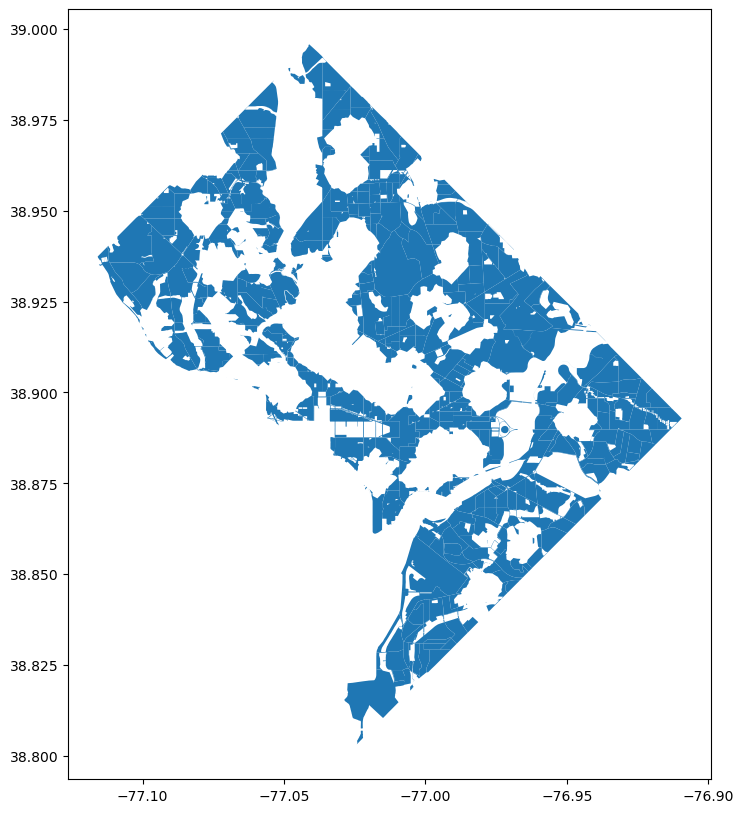

In [47]:
tracts.plot(figsize=(12,10))

# Merging/ joining the data

Next, I will merge the census data from social explorer with my census tracts from geojson

In [48]:
#my attempt to remove trailing whitespace
race2['FIPS'].isspace()

AttributeError: 'Series' object has no attribute 'isspace'

In [ ]:
#my attempt of checking for trailing white space
race2['FIPS'],'without trailing space'.endswith(' ')
True

In [ ]:
#my attempt of using a for loop to remove trailing white space from FIPS column
for string in tracts.iterrows():
    'FIPS'.strip()

In [ ]:
tracts['FIPS'].head()

In [ ]:
tracts_race_lfa=tracts.merge(race2,on='FIPS')

In [ ]:
tracts_race_lfa.head(10)

In [ ]:
tracts_race_lfa.plot(figsize=(12,10))

# Plotting the race/ ethnicity distribution

Now, I will produce a series of map (because I was having fun visualizing!)

First I will plot the Non Hispanic Black distribution in the City of Washington D.C. using different schemes: natural breaks, equal interval, and quantiles. 

In [ ]:
tracts_race_lfa.plot(figsize=(12,10),
                 column='Not Hispanic or Latino Black Alone',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
tracts_race.plot(figsize=(12,10),
                 column='Not Hispanic or Latino Black Alone',
                 legend=True, 
                 scheme='equal_interval')

In [ ]:
#I haven't gone past this point with my new data-here on is from last week
tracts_race.plot(figsize=(12,10),
                 column='Not Hispanic or Latino Black Alone',
                 legend=True, 
                 scheme='quantiles')

Next, I'm interested in visualizing how segregated Washington D.C. is. I want to see if neighborhoods have racial/ethnic diversity, or if there are high concentrations of white people in the NW quadrant and high concentrations of black people in the SE quadrant. I'm also interested in seeing the distribution of Asian and Hispanic folks throughout the city.

In order to visualize racial/ethnic distribution in the City of Washington D.C., I need to find the percentages of each racial group of interest in relation to the total population. 

In [ ]:
tracts_race['PCT_Black'] = tracts_race['Not Hispanic or Latino Black Alone']/tracts_race['Total Population']*100
tracts_race['PCT_White'] = tracts_race['Not Hispanic or Latino White Alone']/tracts_race['Total Population']*100
tracts_race['PCT_Asian'] = tracts_race['Not Hispanic or Latino Asian Alone']/tracts_race['Total Population']*100
tracts_race['PCT_Hispanic'] = tracts_race['Hispanic or Latino']/tracts_race['Total Population']*100

First, I will plot census tracts based on their percent black population.

In [ ]:
tracts_race.plot(figsize=(12,10),
                 column='PCT_Black',
                 legend=True, 
                 scheme='equal_interval')

This map shows that the SE quadrant of D.C. has a noticably high concentration of black people. There is a clear divide between east and west, in which there are significantly more black individuals living in the eastern region of the city.

Next is a visualization of census tracts in D.C. based on their percent Hispanic population.

In [ ]:
tracts_race.plot(figsize=(12,10),
                 column='PCT_Hispanic',
                 legend=True, 
                 scheme='equal_interval')

Hispanic folks are more dispersed throughout the city and make up a minority in most census tracts. The highest percentages of Hispanic individuals are found in the NE quadrant.

Next I am interested in inspecting census tracts based on their percent white people.

In [ ]:
tracts_race.plot(figsize=(12,10),
                 column='PCT_White',
                 legend=True, 
                 scheme='equal_interval')

As expected, based on the visualizations above, there is a stark contrast between east and west, pointing to a segregated city. The majority of white people reside in the western side of Washington D.C. White people are the minority in the SE quadrant.

Finally, I will plot the percent asian within census tracts.

In [ ]:
tracts_race.plot(figsize=(12,10),
                 column='PCT_Asian',
                 legend=True, 
                 scheme='equal_interval')

The asian community seems relatively small in Washington D.C., making up the minority in most census tracts. Highest concentrations of asian folks are in the NW quadrant.

Next, I am interested in plotting census tracts that reach a certain threshold of interest.

First, having seen the high concentration of black folks in the eastern part of the city, I want to see how many census tracts are less than 25% white.

In [ ]:
tracts_race[tracts_race.PCT_White < 25].plot(figsize=(12,10))

As expected, these census tracts with less than 25% white people are located in the eastern region of the city. 
Next, I will confirm that this matches where I expect to see a high concentration of black people based on previous visualizations. For this next plot, I am interested in seeing how many census tracts house over 85% black residents.

In [ ]:
tracts_race[tracts_race.PCT_Black > 85].plot(figsize=(12,10))

This map above makes sense based on my previous visualizations.

Out of curiosity, knowing the significant racial contrast within the city, I want to see how many census tracts are over 50% white.

In [ ]:
tracts_race[tracts_race.PCT_White > 50].plot(figsize=(12,10))

# Creating a choropleth map

Finally, I want to display census tracts based on percent black relative to total population. In order to do this, I will use folium to create the folium map.

In [ ]:
import folium

In [ ]:
m = folium.Map(location=[38.9072,-77.0369], 
               zoom_start = 11,
               tiles='CartoDB positron', 
               attribution='CartoDB')

In [ ]:
folium.Choropleth(
                  geo_data=tracts_race,
                  data=tracts_race,         
                  key_on='feature.properties.FIPS',
                  columns=['FIPS', 'PCT_Black'], 
                  fill_color='YlGn',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, 
                  legend_name='Population Black (2020)').add_to(m)   
m

# NB Viewer

In the event that Github doesn't display my interactive map above, here is a link to nbviewer, which displays my interactive map at the end of my notebook. 
https://nbviewer.org/github/rseiberg/food_access_dc/blob/main/Group%20Assignments/Group%20assignment%202/Group_assignment_2_rs.ipynb

In [49]:
git config pull.rebase false # merge

SyntaxError: invalid syntax (1056818559.py, line 1)